# cbrRetrieve Agent

Steps:
1. [x] Look in Repo for current CaseBase
2. [x] Create new Problem Case and init environment folder
3. [x] Calculate Similarities
    - [x] Local Similarity (nb_actions, gameplay)
    - [x] Global Similarity (between cases)
4. [x] Retrieve solution candidates

## Look in Repo for current CaseBase
## Create new Problem Case and init environment folder

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import gym
import matplotlib.pyplot as plt
from rl.core import Processor
import numpy as np
from PIL import Image
import time
import cv2
from keras.models import Sequential, load_model
from keras.utils import normalize
import import_ipynb
from cbrSimilarity import Weights

Using TensorFlow backend.


importing Jupyter notebook from cbrSimilarity.ipynb


In [14]:
class InitEnv():
      """
      Initializes the new target environment.

      Parameters:
      env_name - (str) Name of target gameplay task.
      """
    def __init__(self, env_name,visualize=True):
        """
        Agent initializes the new target environment.
        
        Parameters:
        env_name - (str) Name of target gameplay task.
        """
           
            
        self.env_name = env_name
        self.model_repo = './KC/ModelRepo/'
        self.root_game_folder = (self.model_repo + 
                                 'Atari_' + self.env_name)
        
        self.policy_folder = (self.root_game_folder + '/Policy/')
        
        self.architecture_folder = (self.root_game_folder + 
                                                    '/Architecture/')
        
        self.gameplay_folder = (self.root_game_folder + '/GamePlay/')
        
        self.existing_folder_structure = False
        
        self.checkEnvAvailability()
        
        self.createRootFolder()
        
        self.env = None
        
        self.nb_actions = None
        self.visualize = visualize
        
        self.envCheck()
    
    def checkEnvAvailability(self):
        """
        Checks, if the current target gameplay task is already inside 
        the model repository
        """
        for folder in os.listdir(self.model_repo):
            if self.env_name in folder:
                self.existing_folder_structure = True
                break
            else:
                pass
            
        if self.existing_folder_structure:
            print(f"Found existing folder structure"+
                      f" for {self.env_name}")
        else:
            print(f"Found no folder for {self.env_name}")
        
    def createRootFolder(self):
        """
        Creates root folder for target gameplay task, if folder does
        not exist.
        """
        if self.existing_folder_structure:
            pass
        else:
            print("-----------")
            print(f"Creating new folder structure.")
            os.mkdir(self.root_game_folder)
            os.mkdir(self.policy_folder)
            os.mkdir(self.gameplay_folder)
            os.mkdir(self.architecture_folder)
            print("Created successfully all folders for the env.")
            
    def envCheck(self):
        """
        Target gameplay task inits for the first time.
        """
        if self.existing_folder_structure == False:
            self.env = gym.make(self.env_name)
            self.env.reset()
            action = 1
            observation, reward, done, info = self.env.step(action)
            save_name = self.gameplay_folder+self.env_name+'_init.png'
            plt.imsave(save_name,observation)
            if self.visualize:
                plt.imshow(observation)
                plt.show()
            else:
                pass
            self.nb_actions = self.env.action_space.n
            act_means = self.env.unwrapped.get_action_meanings()
            
            if self.visualize:
                print(f"Saved init image to: {self.gameplay_folder}")
                print()
                print(f"Number of Action: {self.nb_actions}")
                print()
                print(f"Action Meanings:\n{act_means}")
                print()
                print(f"\nLives:{info['ale.lives']}")
            else:
                pass
            self.env.close()
            
        else:
            self.env = gym.make(self.env_name)
            self.env.reset()
            action = 1
            observation, reward, done, info = self.env.step(action)
            if self.visualize:
                plt.imshow(observation)
                plt.show()
            else:
                pass
            self.nb_actions = self.env.action_space.n
            act_means = self.env.unwrapped.get_action_meanings()
            
            if self.visualize:
                print(f"Number of Action: {self.nb_actions}")
                print()
                print(f"Action Meanings:\n{act_means}")
                print()
                print(f"\nLives:{info['ale.lives']}")
            else:
                pass
            self.env.close()
            

In [15]:
class CaseBaseAgent():
    """
    Agent creates case base and query case.
    """
    
    def __init__(self,query_case_env):
        """
        Initializes query and case base.
        
        Parameter:
        query_case_env - (str) current target gameplay task
        """
        
        self.path_to_games = './KC/ModelRepo/'
        
        #CB
        self.environments = self.getEnvironments()
        self.cases = self.getCases()
        
        #Query Case
        self.query_case_env = query_case_env
        self.query_case = self.createQueryCase()
        
        #InitEnv(self.query_case_env)
        self.printCases()
        InitEnv(self.query_case_env)
        
    def printCases(self):
        """
        Prints the current case base + target gameplay task
        """
        print("Case-Base:\n")
        print(self.cases)
        print("-------")
        print("Query Case:\n")
        print(self.query_case)
        print("-------")
        
    def getEnvironments(self):
        """
        Retrieves environments from model repository.
        """
        
        environments = []
        for folder in os.listdir(self.path_to_games):
            if 'Atari' in folder:
                #print(folder)
                env = folder.split(sep='_')
                env = env[1]
                environments.append(env)
        environments.sort()
        return environments
    
    def getCases(self):
        """
        Retrieves all cases fromt he model repository.
        """
        cases = {}
        for env in self.environments:
            cases[env]= self.envActions(env)
        return cases
            
    def envActions(self,env_name):
        """
        Checks the action size of each environment.
        """
        env = gym.make(env_name)
        nb_actions = env.action_space.n
        return nb_actions
    
    def createQueryCase(self):
        """
        Creates query case.
        """
        query = {}
        query[self.query_case_env] = self.envActions(self.query_case_env)
        return query

    @property
    def getCaseBase(self):
        """
        Returns case base.
        """
        return self.cases
    
    @property
    def getIndividualCases(self):
        """
        Returns all environments from model repository.
        """
        return self.environments
    
    @property
    def getQueryCase(self):
        """
        Returns target gameplay task.
        """
        return self.query_case

In [16]:
ENV_NAME = 'BreakoutDeterministic-v4'

Case-Base:

{'Assault-v0': 7, 'BreakoutDeterministic-v4': 4, 'MsPacman-v0': 9, 'Seaquest-v0': 18, 'SpaceInvaders-v0': 6}
-------
Query Case:

{'BreakoutDeterministic-v4': 4}
-------
Found existing folder structure for BreakoutDeterministic-v4


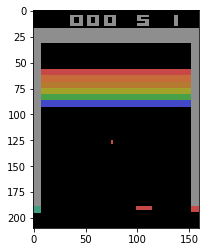

Number of Action: 4

Action Meanings:
['NOOP', 'FIRE', 'RIGHT', 'LEFT']


Lives:5


In [17]:
caseAgent = CaseBaseAgent(query_case_env=ENV_NAME)

In [18]:
caseBase = caseAgent.getCaseBase
caseBase_environments = caseAgent.getIndividualCases

queryCase = caseAgent.getQueryCase
queryEnvironment = caseAgent.query_case_env
#queryCase

## Calculate Similarities

### Local Similarity

#### nb_actions

1. [x] $normalize = \frac{x-min(x)}{max(x)-min(x)}$


2. [x] $Dist_{euclidean}(nb\_actions_{case},nb_actions\_{query} =  \sqrt{\displaystyle\sum_{i=1}^{n} (nb\_actions_{case}-nb\_actions_{query})^{2}} $


3. [x] $Sim = \frac{1}{1+Dist_{euclidean}}$


In [20]:
class actionSim():
    """
    This agent calculates the local similarity of between the cases 
    and the target gameplay task for the nb_actions attribute.
    """
    
    def __init__(self, 
                 caseBase, 
                 caseBase_environments, 
                 queryCase,
                 queryEnvironment):
        
        """
        Initializes the agent.
        
        Parameters:
        caseBase - dict with model repository cases and nb_actions
        caseBase_environments - list of env within model repository
        queryCase - dict with query case and nb_actions
        queryEnvironment - (str) current query env
        """
        
        self.caseBase = caseBase
        self.caseBase_environments = caseBase_environments
        
        self.queryCase = queryCase
        self.queryEnvironment = queryEnvironment

        self.actionsCB = self.getActionsCB()
        self.actionQuery = []
        self.actionQuery.append(self.queryCase[self.queryEnvironment])
        
        self.all_actions = []
        self.getAllActions()
        
        self.normedCB = []
        self.normalizeCB()
        
        self.normedQuery = []
        self.normalizeQuery()
        
        self.distances = []
        self.calcDistance()
        
        self.nb_actions_similarities = []
        self.calcSimilarities()
        
        self.envs_with_action_sims = self.simsToEnvs()
        
        
    def getActionsCB(self):
        """
        Stores model repository actions in local var.
        """
        actions = []
        for case in self.caseBase:
            actions.append(self.caseBase[case])
        return actions
    
    def getAllActions(self):
        """
        Extracts actions from model repository
        """
        for action in self.actionsCB:
            self.all_actions.append(action)
        for action in self.actionQuery:
            self.all_actions.append(action)
            
    def normalize(self,x, values):
        """
        Normalizes the attribute nb_actions
        """
        return (x-np.min(values))/(np.max(values)-np.min(values))
    
    def normalizeCB(self):
        """
        Normalizes the casebase
        """
        for value in self.actionsCB:
            norm = self.normalize(value,self.all_actions)
            self.normedCB.append(norm)
    
    def normalizeQuery(self):
        """
        Normalizes the query case
        """
        for value in self.actionQuery:
            norm = self.normalize(value,self.all_actions)
            self.normedQuery.append(norm)
            
    def euclideanDist(self,x1,x2):
        """
        Calculates the euclidean distance
        """
        return np.sqrt(np.sum(np.power(x1-x2,2)))
    
    def calcDistance(self):
        """
        Calculates the distances between cases
        """
        for value in self.normedCB:
            dist = self.euclideanDist(value,self.normedQuery)
            self.distances.append(dist)
    
    def similarity(self,dist):
        """
        Calculates the local similarity for the nb_action attribute
        """
        return (1.0/(1+dist))
    
    def calcSimilarities(self):
        """
        Calculates the local similarity for the nb_action attribute 
        for the case base
        """
        for dist in self.distances:
            sim = self.similarity(dist)
            self.nb_actions_similarities.append(sim)
            
    def simsToEnvs(self):
        """
        Stores the similarities inside an dict
        """
        i = 0
        action_env_dict = {}
        for env in self.caseBase_environments:
            action_env_dict[env] = self.nb_actions_similarities[i]
            i+=1
        return action_env_dict
    
    @property
    def getActionSims(self):
        """
        Returns the local similarity for the nb_action attribute
        """
        return self.envs_with_action_sims

In [21]:
actionSims = actionSim(caseBase=caseBase,
                       caseBase_environments=caseBase_environments,
                       queryCase=queryCase,
                       queryEnvironment=queryEnvironment)

In [22]:
actionSims.getActionSims
actionSimsCB = actionSims.getActionSims

{'Assault-v0': 0.823529411764706,
 'BreakoutDeterministic-v4': 1.0,
 'MsPacman-v0': 0.7368421052631579,
 'Seaquest-v0': 0.5,
 'SpaceInvaders-v0': 0.875}

#### gameplay
1. [x] Load query image
2. [x] Show query and casebase images
3. [x] Calculate gameplay similarities

In [24]:
class gameplaySim():
    """
    Agent calculates the similarity for the gameplay attribute
    
    """
    
    def __init__(self, 
                 caseBase, 
                 caseBase_environments, 
                 queryCase,
                 queryEnvironment):
        
        """
        Initializes the agent.
        
        Parameters:
        caseBase - dict with model repository cases and nb_actions
        caseBase_environments - list of env within model repository
        queryCase - dict with query case and nb_actions
        queryEnvironment - (str) current query env
        """
        
        self.retrievalWeights = Weights()
        #action_weight= retrievalWeights.action_weight
        #gameplay_weight = retrievalWeights.gameplay_weight
        #softmax_weight = retrievalWeights.softmax_weight
        #sigmoid_weight = retrievalWeights.sigmoid_weight
        #sim_threshold = retrievalWeights.sigmoid_weight
        
        
        self.IMG_SIZE = 84
        
        self.caseBase = caseBase
        self.caseBase_environments = caseBase_environments
        
        self.queryCase = queryCase
        self.queryEnvironment = queryEnvironment
        
        self.nnRepo = './KC/CNN/'
        
        self.modelRepo = './KC/ModelRepo/Atari_'
        
        self.sig_weight = self.retrievalWeights.sigmoid_weight
        self.soft_weight = self.retrievalWeights.softmax_weight
        
        #print(f"Sigmoid weight: {self.sig_weight}")
        #print(f"Softmax weight: {self.soft_weight}")
        
        self.model_sig = None
        
        self.model_soft = None
        
        self.getPredictionModels()
        
        #print(f"used mode sig: {self.model_sig}")
        
        self.queryImagePath = None
        self.getQueryImg()
        
        self.caseBaseImagePaths = None
        self.getCaseBaseImg()
        
        self.sigPredictions = None
        self.getSigPredictions()
        #print(f"Sig Pred: {self.sigPredictions}")
        
        self.softPredictions = None
        self.getSoftPredictions()
        #print(f"Soft Pred: {self.softPredictions}")
        
        self.gamePlaySim = (self.sig_weight*self.sigPredictions+
                               self.soft_weight*self.softPredictions)
        
        self.gamePlaySim = np.round(self.gamePlaySim,4)
        self.gamePlaySim = list(self.gamePlaySim)
        
        self.env_with_gameplay_sim = self.simsToEnvs()
        
        self.showEnvironmentImages()
        
        
        
    def getPredictionModels(self):
        """
        Retrieves the prediction models from the KC
        """
        for predictionModel in os.listdir(self.nnRepo):
            if 'sigmoid' in predictionModel:
                file_path = self.nnRepo+predictionModel
                self.model_sig = load_model(file_path)
                
            elif 'softmax' in predictionModel:
                file_path = self.nnRepo+predictionModel
                self.model_soft = load_model(file_path)
                
            else:
                pass
            
    def getQueryImg(self):
        """
        Retrieves an images from the target gameplay task
        """
        path = self.modelRepo+self.queryEnvironment+'/GamePlay/'
        for img in os.listdir(path):
            if 'png' in img:
                img_path = path+img
                self.queryImagePath = img_path
                break
                
    def getCaseBaseImg(self):
        """
        Retrieves a random image from the model repository for each 
        environment.
        """
        casebase_gameplay_paths = []
        
        #get all paths
        for game in self.caseBase_environments:
            path_to_gameplay = self.modelRepo+game+'/Gameplay/'
            casebase_gameplay_paths.append(path_to_gameplay)
           
        #retrieve images
        img_path = []
        for path in casebase_gameplay_paths:
            for img in os.listdir(path):
                if 'png' in img:
                    if 'aug' in img:
                        pass
                    else:
                        img_path.append(img)
                        break
        #store images
        casebaseImages = []
        i = 0
        for path in casebase_gameplay_paths:
            path_to_img = path+img_path[i]
            casebaseImages.append(path_to_img)
            i+=1
            
            
        self.caseBaseImagePaths = casebaseImages
        
    def showEnvironmentImages(self):
        """
        Display images
        """
        print("Comparing gameplay images...")
        
        fig = plt.figure(figsize=(10,4*len(self.caseBaseImagePaths)))
        grid = fig.add_gridspec(len(self.caseBaseImagePaths),2)
        
        
        rows = grid[0].get_gridspec().get_geometry()[0]
        cols = grid[0].get_gridspec().get_geometry()[1]

        for row in range(rows):
            for col in range(cols):
                if col==0:
                    title = self.queryEnvironment
                    queryImg = plt.imread(self.queryImagePath)
                    axQuery = fig.add_subplot(grid[row,0])
                    axQuery.imshow(queryImg)
                    axQuery.set(title=title)
                else:
                    title = (self.caseBase_environments[row]+
                             " Sim:"+
                             str(self.gamePlaySim[row]))
                    caseImg = plt.imread(self.caseBaseImagePaths[row])
                    axCase = fig.add_subplot(grid[row,col])
                    axCase.imshow(caseImg)
                    axCase.set(title=title)
                    
    def predictNN(self,img,model):
        """
        Predict the estimated probability, that the query image is
        from the model repository.
        
        """
        
        predictions = []
        img2 = cv2.imread(img,cv2.IMREAD_GRAYSCALE) 
        new_array = cv2.resize(img2,(self.IMG_SIZE,self.IMG_SIZE))
        new_array = np.array(new_array).reshape(-1,self.IMG_SIZE,self.IMG_SIZE,1)
        x_new = normalize(new_array,axis=1)
        new_pred = model.predict(x_new)
        for value in new_pred[0]:
            predictions.append(value)
        return np.asarray(predictions)
    
    def getSigPredictions(self):
        """
        Calculate predictions for the sigmoid model.
        """
        self.sigPredictions = self.predictNN(self.queryImagePath,
                                             self.model_sig)
    
    def getSoftPredictions(self):
        """
        Calculate predictions for the softmax model.
        """
        self.softPredictions = self.predictNN(self.queryImagePath,
                                             self.model_soft)
        
    def simsToEnvs(self):
        """
        Stores the similarities inside an dict
        """
        i = 0
        gameplay_env_dict = {}
        #print(gameplay_env_dict)
        #print(self.gamePlaySim)
        for env in self.caseBase_environments:
            #print(f"Got: {env}")
            gameplay_env_dict[env] = self.gamePlaySim[i]
            #print(gameplay_env_dict)
            i+=1
        return gameplay_env_dict

Comparing gameplay images...


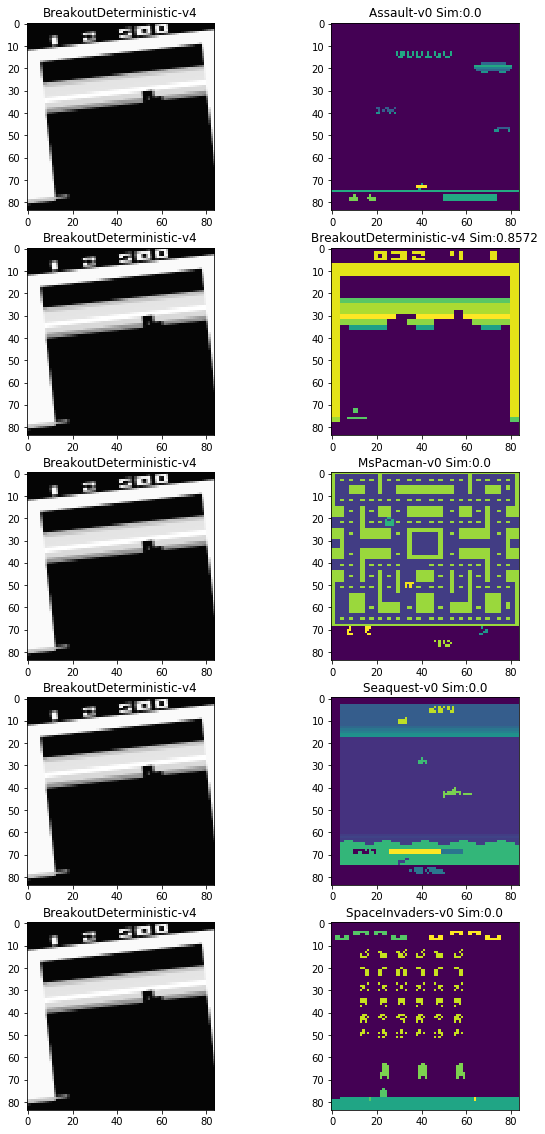

In [25]:
gameSims = gameplaySim(caseBase=caseBase,
                       caseBase_environments=caseBase_environments,
                       queryCase=queryCase,
                       queryEnvironment=queryEnvironment)

In [26]:
gameplaySimsCB = gameSims.env_with_gameplay_sim
gameplaySimsCB

### Gloabl Similarity

In [28]:
class GlobalSim():
    """
    Agent calculates the global similarity (nb_actions, gameplay)
    """
    
    def __init__(self, 
                 caseBase, 
                 caseBase_environments, 
                 queryCase,
                 queryEnvironment,
                 action_similarity,           
                 gameplay_similarity):
        """
        Initializes the agent.
        
        Parameters:
        caseBase - dict with model repository cases and nb_actions
        caseBase_environments - list of env within model repository
        queryCase - dict with query case and nb_actions
        queryEnvironment - (str) current query env
        action_similarity - dict with action similarities
        gameplay_similarity - dict with gameplay similarites
        """
        
        self.retrievalWeights = Weights()
        
        #frame size
        self.IMG_SIZE = 84
        self.SAVETIME = str(int(time.time()))
        
        self.path_to_analysis = './Analysis/Retrieval/'
        
        self.sim_threshold = self.retrievalWeights.sim_threshold
        
        self.action_weight = self.retrievalWeights.action_weight
        self.gameplay_weight = self.retrievalWeights.gameplay_weight
        
        self.sigmoid_weight = self.retrievalWeights.sigmoid_weight
        self.softmax_weight = self.retrievalWeights.softmax_weight
        
        self.caseBase = caseBase
        self.caseBase_environments = caseBase_environments
        
        self.queryCase = queryCase
        self.queryEnvironment = queryEnvironment
        
        self.action_similarity = action_similarity
        self.gameplay_similarity = gameplay_similarity
        
        
        
        self.globalSimilarity = self.calcGlobalSim()
        
        self.mostSimCases = self.getSimilarCases()
        
        self.analyzeSimilarity()
        
    def calcGlobalSim(self):
        """
        Calculate global sim.
        """
        case_glob_sim = {}
        for game in self.gameplay_similarity:
            similarity = (self.action_weight* self.action_similarity[game]+
                          self.gameplay_weight* self.gameplay_similarity[game])

            case_glob_sim[game] = similarity
        return case_glob_sim
        
    def getSimilarCases(self): 
        """
        Retrieve similar cases.
        """
        simEnv = {}
        for game in self.globalSimilarity:
            if self.globalSimilarity[game]>self.sim_threshold:
                simEnv[game] = self.globalSimilarity[game]
                
        #Sort Cases by similarity
        simEnv={k: v for k, v in sorted(simEnv.items(), 
                                 key=lambda item: item[1],
                                 reverse=True)}
        return simEnv
    
    def analyzeSimilarity(self):
        """
        Create analyzis (charts).
        """
        games = []
        simi = []
        for game in self.globalSimilarity:
            games.append(game)
            simi.append(self.globalSimilarity[game])
        color_gray= '#979797'
        color_red = '#FF0000'


        fig, ax = plt.subplots(figsize=[15,7])

        title = ('Global Similarity\n\n'+
                 f'Query Case: {self.queryEnvironment}\n'+
                 f'Action Weight:{self.action_weight}\n'+
                 f'Gameplay Weight:{self.gameplay_weight}\n'+ 
                 f'Softmax Weight:{self.softmax_weight}\n'+
                 f'Sigmoid Weight:{self.sigmoid_weight}')


        ax.bar(games,simi,color=color_gray)
        ax.axhline(y=0.4,color=color_red,label=f'Threshold: {self.sim_threshold}')
        ax.set(title=title,ylabel="Similarity")
        ax.legend(loc='best')
        save_name = ('_'+self.SAVETIME+
                     '_Query_'
                     +self.queryEnvironment
                     +'.png')

        #round
        simi_round = list(np.around(np.array(simi),2))
        for index,data in enumerate(simi_round):
            plt.text(x=index , y =data+0.005 , s=f"{data}")
            
        plt.savefig(self.path_to_analysis+save_name,bbox_inches = 'tight')
        plt.show()

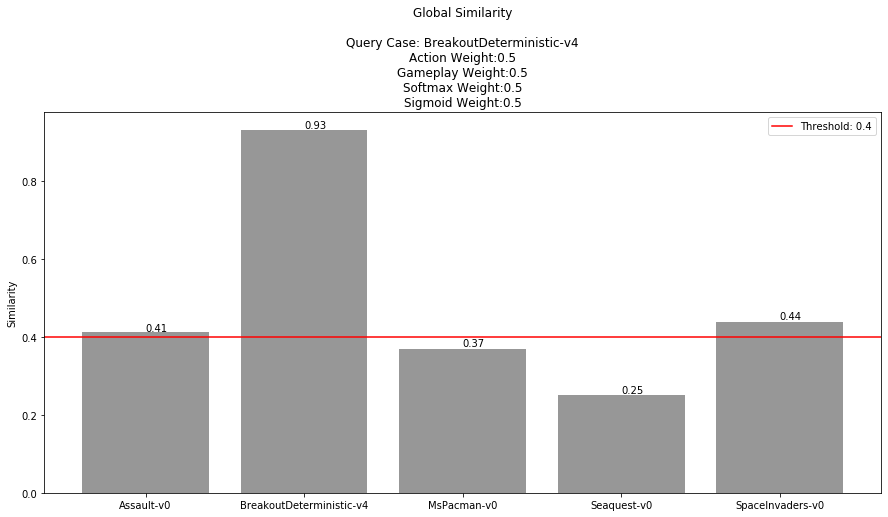

In [29]:
globSim = GlobalSim(caseBase=caseBase,
                    caseBase_environments=caseBase_environments,
                    queryCase=queryCase,
                    queryEnvironment=queryEnvironment,
                    action_similarity=actionSimsCB,
                    gameplay_similarity = gameplaySimsCB)

In [30]:
mostSimCases = globSim.mostSimCases
mostSimCases